 ## Projeto final - ENEM
---

### Introdução
 
O Exame Nacional do Ensino Médio (Enem), tem como objetivo avaliar o desempenho escolar dos estudantes ao término da educação básica e desde 2009 passou a ser utilizado como mecanismo de acesso à educação superior.

No Enem, para medir o conhecimento do participante, a prova é elaborada com 45 questões em cada área do conhecimento (Ciências da Natureza,Ciências Humanas, Linguagens e Códigos Matemática), além de redação.É importante ressaltar que no exame não existe um limite de padrão inferior ou superior, ou seja, as proficiências dos participantes não variam entre zero e mil. Os valores máximos e mínimos de cada prova dependem das características dos itens selecionados, exceto a redação que tem valor máximo de mil.
    
Sobre a análise das notas, deve-se saber que estas não se baseiam na quantitade de questões e sim na composição da questão, utilizando o  modelo de Teoria de Resposta ao Item (TRI) , modelo matemático capaz de representar a relação entre a probabilidade de o participante responder corretamente a uma questão, seu conhecimento na área em que está sendo avaliado e as características (parâmetros) dos itens. Um aspecto importante da TRI é que ela considera a particularidade de cada item.

A proficiência é verificada com apoio na análise do perfil das respostas, levando em conta a coerência das respostas. Se o participanteacerta a questão de um nível acima, que utiliza conhecimentos de um nível abaixo, podemosinferir que não existe coerência nas respostas e, dessa forma, os acertos acrescentarãomenos na nota do participante.
### Objetivos 

##### O objetivo dessa análise é explorar os dados do ENEM 2021, de forma a visualizar tendências. Os pontos analisados serão:

1. Analisar a influência do sexo nas notas
2. Analisar a influência da conclusão do ensino médio nas notas
3. Analisar a influência da renda familiar nas notas 
4. Analisar a influência dos Estados nas notas
    
###### Os dados e informações aqui utilizados  tem origem no Instituto nacional de Estudos e Pesquisas educacionais Anísio Teixeira -INEP, podendo serem acessados em:
https://www.gov.br/inep/pt-br/acesso-a-informacao/dados-abertos/microdados/enem

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import statistics  as sts
import matplotlib.pyplot as plt

In [3]:
import missingno as msno

##### Importação do csv com os microdados do enem 2021, encontrados no site do INEP

In [2]:
db = pd.read_csv("C:\\Users\la-re\Downloads\microdados_enem_2021_2\DADOS\MICRODADOS_ENEM_2021.csv", encoding='ISO-8859-1',sep = ';')

db.head(2)


,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,210053865474,2021,5,F,1,1,1,1,3,1,...,A,A,A,B,A,A,B,A,B,B
1,210052384164,2021,12,M,1,1,1,1,11,1,...,A,A,A,B,A,A,C,A,A,A


In [3]:
db_2021_selec = db.drop(columns=['NU_INSCRICAO','TX_RESPOSTAS_CN','TX_RESPOSTAS_CH','TX_RESPOSTAS_LC','TX_RESPOSTAS_MT','TX_GABARITO_CN','TX_GABARITO_CH','TX_GABARITO_LC','TX_GABARITO_MT','CO_PROVA_MT','CO_PROVA_LC','CO_PROVA_CN',
'CO_PROVA_CH','CO_MUNICIPIO_PROVA','NO_MUNICIPIO_PROVA','CO_UF_PROVA','CO_MUNICIPIO_ESC','NO_MUNICIPIO_ESC','CO_UF_ESC','SG_UF_ESC','TP_DEPENDENCIA_ADM_ESC','TP_LOCALIZACAO_ESC',
'TP_SIT_FUNC_ESC','Q008','Q009','Q010','Q011','Q012','Q013','Q014','Q015','Q016','Q017','Q018','Q019','Q020','Q021','Q022','Q023','Q024','Q025'])

In [4]:
db_2021_selec.head(5)

,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,...,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007
0,2021,5,F,1,1,1,1,3,1,NaN,...,180.0,200.0,760.0,F,F,B,B,3.0,D,A
1,2021,12,M,1,1,1,1,11,1,NaN,...,120.0,80.0,560.0,B,B,B,B,3.0,B,A
2,2021,13,F,3,1,1,1,15,1,NaN,...,NaN,NaN,NaN,B,C,C,B,3.0,C,A
3,2021,3,M,1,3,1,2,0,2,1.0,...,200.0,160.0,780.0,B,B,B,B,6.0,B,A
4,2021,2,F,1,3,1,2,0,2,1.0,...,180.0,180.0,780.0,D,E,F,D,4.0,C,A


### Análise geral dos dados - Enem 2021:

In [5]:
def show_info(data):
    print('DATASET SHAPE: ', data.shape, '(linhas e colunas) \n')
    print('-'*50)
    print('FEATURE DATA TYPES:')
    print(data.info())
    print('NUMBER OF UNIQUE VALUES PER FEATURE:', '\n')
    print(data.nunique())
    print('NULL VALUES PER FEATURE')
    print(data.isnull().sum())
show_info(db_2021_selec)

DATASET SHAPE:  (3389832, 35) (linhas e colunas) 

--------------------------------------------------
FEATURE DATA TYPES:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3389832 entries, 0 to 3389831
Data columns (total 35 columns):
 #   Column             Dtype  
---  ------             -----  
 0   NU_ANO             int64  
 1   TP_FAIXA_ETARIA    int64  
 2   TP_SEXO            object 
 3   TP_ESTADO_CIVIL    int64  
 4   TP_COR_RACA        int64  
 5   TP_NACIONALIDADE   int64  
 6   TP_ST_CONCLUSAO    int64  
 7   TP_ANO_CONCLUIU    int64  
 8   TP_ESCOLA          int64  
 9   TP_ENSINO          float64
 10  IN_TREINEIRO       int64  
 11  SG_UF_PROVA        object 
 12  TP_PRESENCA_CN     int64  
 13  TP_PRESENCA_CH     int64  
 14  TP_PRESENCA_LC     int64  
 15  TP_PRESENCA_MT     int64  
 16  NU_NOTA_CN         float64
 17  NU_NOTA_CH         float64
 18  NU_NOTA_LC         float64
 19  NU_NOTA_MT         float64
 20  TP_LINGUA          int64  
 21  TP_STATUS_REDACAO  float

###### Obs: Apesar de tipo de dados ser inteiro em algumas colunas, o significado desse valor deve ser analisado com cuidado, pois ele  depende da legenda e pode causar análises equivocadas

In [6]:
#verifaçao do NULL VALUES PER FEATURE das notas em cada matéria como os faltantes + os eliminados.
db_2021_selec['TP_PRESENCA_CN'].value_counts()

1    2245844
0    1142539
2       1449
Name: TP_PRESENCA_CN, dtype: int64

###### Serao apagados as linhas dos valores NaN das notas 'NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_MT' e consequentemente as da redação também ficarão sem os NaN

In [7]:
db_2021_selec_limpos = db_2021_selec.dropna(subset = {"NU_NOTA_CN",'NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_MT'}) # exclusão das linhas nulas


In [8]:
db_2021_selec_limpos.describe() #resumo das variaveis quantitativas. 

,NU_ANO,TP_FAIXA_ETARIA,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,...,NU_NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q005
count,2238107.0,2.238107e+06,2.238107e+06,2.238107e+06,2.238107e+06,2.238107e+06,2.238107e+06,2.238107e+06,828996.000000,2.238107e+06,...,2.238107e+06,2.238107e+06,2.238107e+06,2.238107e+06,2.238107e+06,2.238107e+06,2.238107e+06,2.238107e+06,2.238107e+06,2.238106e+06
mean,2021.0,4.501463e+00,1.032940e+00,1.985461e+00,1.026737e+00,1.715638e+00,2.004855e+00,1.458762e+00,1.004976,1.641445e-01,...,5.351971e+02,4.290997e-01,1.112739e+00,1.206923e+02,1.399525e+02,1.168930e+02,1.299222e+02,1.150862e+02,6.225462e+02,3.778074e+00
std,0.0,3.537410e+00,3.577890e-01,1.022828e+00,2.070285e-01,7.411084e-01,3.795310e+00,6.392017e-01,0.070364,3.704067e-01,...,1.105777e+02,4.949477e-01,7.174077e-01,3.243648e+01,4.429136e+01,3.510357e+01,3.745456e+01,5.923479e+01,1.839687e+02,1.306132e+00
min,2021.0,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000,0.000000e+00,...,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
25%,2021.0,2.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000,0.000000e+00,...,4.448000e+02,0.000000e+00,1.000000e+00,1.000000e+02,1.200000e+02,1.000000e+02,1.200000e+02,8.000000e+01,5.200000e+02,3.000000e+00
50%,2021.0,3.000000e+00,1.000000e+00,2.000000e+00,1.000000e+00,2.000000e+00,0.000000e+00,1.000000e+00,1.000000,0.000000e+00,...,5.155000e+02,0.000000e+00,1.000000e+00,1.200000e+02,1.200000e+02,1.200000e+02,1.200000e+02,1.200000e+02,6.200000e+02,4.000000e+00
75%,2021.0,5.000000e+00,1.000000e+00,3.000000e+00,1.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,1.000000,0.000000e+00,...,6.140000e+02,1.000000e+00,1.000000e+00,1.400000e+02,1.800000e+02,1.400000e+02,1.600000e+02,1.600000e+02,7.400000e+02,4.000000e+00
max,2021.0,2.000000e+01,4.000000e+00,6.000000e+00,4.000000e+00,4.000000e+00,1.500000e+01,3.000000e+00,2.000000,1.000000e+00,...,9.531000e+02,1.000000e+00,9.000000e+00,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02,1.000000e+03,2.000000e+01


TP_FAIXA_ETARIA: 75% = 5 ou seja, a maioria dos candidados tem ate 20 anos, segundo a legenda dos microdados.

TP_COR_RACA: o numero de Amarela,Indígena ,Não dispõe da informação são bem menores.



In [9]:
show_info(db_2021_selec_limpos)

DATASET SHAPE:  (2238107, 35) (linhas e colunas) 

--------------------------------------------------
FEATURE DATA TYPES:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2238107 entries, 1 to 3389830
Data columns (total 35 columns):
 #   Column             Dtype  
---  ------             -----  
 0   NU_ANO             int64  
 1   TP_FAIXA_ETARIA    int64  
 2   TP_SEXO            object 
 3   TP_ESTADO_CIVIL    int64  
 4   TP_COR_RACA        int64  
 5   TP_NACIONALIDADE   int64  
 6   TP_ST_CONCLUSAO    int64  
 7   TP_ANO_CONCLUIU    int64  
 8   TP_ESCOLA          int64  
 9   TP_ENSINO          float64
 10  IN_TREINEIRO       int64  
 11  SG_UF_PROVA        object 
 12  TP_PRESENCA_CN     int64  
 13  TP_PRESENCA_CH     int64  
 14  TP_PRESENCA_LC     int64  
 15  TP_PRESENCA_MT     int64  
 16  NU_NOTA_CN         float64
 17  NU_NOTA_CH         float64
 18  NU_NOTA_LC         float64
 19  NU_NOTA_MT         float64
 20  TP_LINGUA          int64  
 21  TP_STATUS_REDACAO  float

In [10]:
#Porcentagem de faltantes.
((3389832-2238107)/3389832)*100


33.975872550616074

In [11]:
db_2021_selec_limpos['TP_SEXO'].value_counts()

F    1381949
M     856158
Name: TP_SEXO, dtype: int64

In [12]:
porc_fememinina=(1381949/2238107)*100
porc_fememinina

61.746332950122586

**61% dos candidatos que fizeram a prova foram do sexo feminino**

## Comparação das notas entre os sexos

In [14]:
notas_gerais5= db_2021_selec_limpos[['TP_SEXO','NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_MT','NU_NOTA_REDACAO','TP_COR_RACA']]
notas_gerais5.sort_values(by='NU_NOTA_CN', ascending=False).head(5)


,TP_SEXO,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,TP_COR_RACA
1486575,F,867.1,748.2,683.9,842.6,740.0,1
1628415,F,867.1,722.7,699.3,871.7,840.0,1
591848,M,867.1,742.9,673.2,944.1,940.0,1
2126029,F,867.1,814.3,659.7,935.0,880.0,1
244402,M,867.1,733.7,676.4,948.8,920.0,1


,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,TP_COR_RACA,TP_SEXO_M
1486575,867.1,748.2,683.9,842.6,740.0,1,0
1628415,867.1,722.7,699.3,871.7,840.0,1,0
591848,867.1,742.9,673.2,944.1,940.0,1,1
2126029,867.1,814.3,659.7,935.0,880.0,1,0
244402,867.1,733.7,676.4,948.8,920.0,1,1


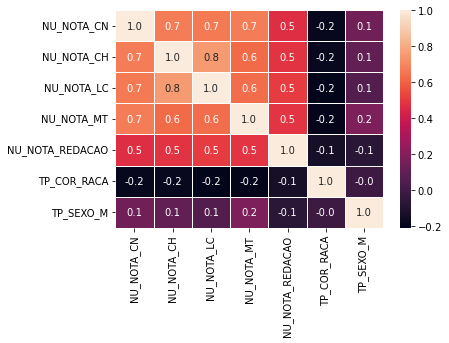

In [153]:
#conversão em variável binária (0,1)
db_dummies=pd.get_dummies(notas_gerais5,columns=['TP_SEXO'],drop_first=True) #feminino = 0 ,masculino =1
correlation4 = db_dummies.corr()

plot = sns.heatmap(correlation4, annot = True, fmt=".1f", linewidths=.8)
plot
db_dummies.sort_values(by='NU_NOTA_CN', ascending=False).head()

##### Significado dos valores de correlação
* ρ = 0,9 a 1 (positivo ou negativo): correlação muito forte;
* ρ = 0,7 a 09 (positivo ou negativo): correlação forte;
* ρ = 0,5 a 0,7 (positivo ou negativo): correlação moderada;
* ρ = 0,3 a 0,5 (positivo ou negativo): correlação fraca;
* ρ = 0 a 0,3 (positivo ou negativo): não possui correlação.

Não houve correlação entre o sexo e as notas, mas houve relação entre as notas das matérias.

In [154]:
notas_gerais.groupby('TP_SEXO').min() # notas mínimas do sexo feminino e masculino.

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT
TP_SEXO,,,,
F,0.0,0.0,0.0,0.0
M,0.0,0.0,0.0,0.0


In [155]:
notas_CN= db_2021_selec_limpos[['TP_SEXO','NU_NOTA_CN']]
notas_CH= db_2021_selec_limpos[['TP_SEXO','NU_NOTA_CH']]
notas_LC= db_2021_selec_limpos[['TP_SEXO','NU_NOTA_LC']]
notas_MT= db_2021_selec_limpos[['TP_SEXO','NU_NOTA_MT']]


In [156]:
#descrição geral das notas de cada matéria
display(notas_CN.groupby('TP_SEXO').describe())
display(notas_CH.groupby('TP_SEXO').describe())
display(notas_LC.groupby('TP_SEXO').describe())
display(notas_MT.groupby('TP_SEXO').describe())


NU_NOTA_CN                                                        
             count        mean        std  min    25%    50%    75%    max
TP_SEXO                                                                   
F        1381949.0  483.205442  76.801419  0.0  426.1  473.0  531.8  867.1
M         856158.0  505.936664  84.262653  0.0  441.3  499.8  565.7  867.1

NU_NOTA_CH                                                        
             count        mean        std  min    25%    50%    75%    max
TP_SEXO                                                                   
F        1381949.0  516.310264  91.321966  0.0  444.9  516.5  582.4  846.9
M         856158.0  534.273942  98.122727  0.0  457.0  541.2  605.9  846.9

NU_NOTA_LC                                                        
             count        mean        std  min    25%    50%    75%    max
TP_SEXO                                                                   
F        1381949.0  501.675265  77.458396  0.0  447.3  504.4  556.6  826.1
M         856158.0  510.040547  78.843505  0.0  455.0  514.8  567.1  813.2

NU_NOTA_MT                                                         
             count        mean         std  min    25%    50%    75%    max
TP_SEXO                                                                    
F        1381949.0  519.903830  103.743143  0.0  437.1  498.5  589.4  953.1
M         856158.0  559.882396  116.640181  0.0  462.0  549.1  647.2  953.1

A média dos homens ficou maior em todas as matérias, mas considerando o desvio padrão (std) a diferença não é significativa. A matéria onde houve uma maior diferença foi em Matemática (NU_NOTA_MT) tendo uma diferença de 50 pontos analisando a média e de 57,8 analisando 75% das notas dos candidatos.

A maior nota na matéria de Linguagens e Códigos foi do sexo feminino e em todas as outras matérias as notas maiores foram iguais entre os sexos

In [22]:
!pip install plotly
pd.options.plotting.backend = "plotly"

In [23]:
notas_redacao = db_2021_selec_limpos[['TP_SEXO','NU_NOTA_REDACAO']]
notas_redacao.groupby('TP_SEXO').describe()

NU_NOTA_REDACAO                                                    \
                  count        mean         std  min    25%    50%    75%   
TP_SEXO                                                                     
F             1381949.0  633.407224  182.574509  0.0  540.0  620.0  760.0   
M              856158.0  605.015102  184.855705  0.0  520.0  600.0  720.0   

                 
            max  
TP_SEXO          
F        1000.0  
M        1000.0

O mesmo foi observado com as notas das redações, mas dessa vez a nota maior foi para as candidatas (sexo feminino), com uma diferença de 28 pontos analisando a média e de 40 pontos analisando os 75% dos candidatos.

##### Para melhor visualização abaixo segue os estados com as 10 maiores médias para cada matéria e o sexo 

In [545]:
notasCN_estado = db_2021_selec_limpos.filter(items=['NU_NOTA_CN','SG_UF_PROVA','TP_SEXO'])\
                  .groupby(['SG_UF_PROVA','TP_SEXO']).mean()\
                  .sort_values(by='NU_NOTA_CN', ascending=False)
notasCH_estado = db_2021_selec_limpos.filter(items=['NU_NOTA_CH','SG_UF_PROVA','TP_SEXO'])\
                  .groupby(['SG_UF_PROVA','TP_SEXO']).mean()\
                  .sort_values(by='NU_NOTA_CH', ascending=False)
notasLC_estado = db_2021_selec_limpos.filter(items=['NU_NOTA_LC','SG_UF_PROVA','TP_SEXO'])\
                  .groupby(['SG_UF_PROVA','TP_SEXO']).mean()\
                  .sort_values(by='NU_NOTA_LC', ascending=False)
notasMT_estado = db_2021_selec_limpos.filter(items=['NU_NOTA_MT','SG_UF_PROVA','TP_SEXO'])\
                  .groupby(['SG_UF_PROVA','TP_SEXO']).mean()\
                  .sort_values(by='NU_NOTA_MT', ascending=False)
notasredacao_estado = db_2021_selec_limpos.filter(items=['NU_NOTA_REDACAO','SG_UF_PROVA','TP_SEXO'])\
                  .groupby(['SG_UF_PROVA','TP_SEXO']).mean()\
                  .sort_values(by='NU_NOTA_REDACAO', ascending=False)
display(notasCN_estado.head(10),notasCH_estado.head(10),notasLC_estado.head(10),notasMT_estado.head(10),notasredacao_estado.head(10))

,,NU_NOTA_CN
SG_UF_PROVA,TP_SEXO,
SP,M,527.092717
DF,M,526.200384
SC,M,525.575207
MG,M,524.232733
RS,M,519.037794
ES,M,518.794426
PR,M,518.450710
RJ,M,516.613657
RN,M,505.169101


,,NU_NOTA_CH
SG_UF_PROVA,TP_SEXO,
SP,M,558.515525
DF,M,556.381417
MG,M,554.401978
SC,M,552.777337
RJ,M,552.361611
RS,M,552.316859
ES,M,544.816515
PR,M,544.259399
SP,F,541.830839


,,NU_NOTA_LC
SG_UF_PROVA,TP_SEXO,
SP,M,534.865725
DF,M,532.136903
SP,F,528.593384
MG,M,527.471602
RJ,M,526.441238
RS,M,525.617208
SC,M,522.746128
DF,F,520.912903
PR,M,519.221252


,,NU_NOTA_MT
SG_UF_PROVA,TP_SEXO,
SP,M,595.593093
MG,M,589.034600
SC,M,586.051732
DF,M,580.512593
RS,M,579.324806
RJ,M,577.964779
ES,M,576.767220
PR,M,573.904934
RN,M,555.032881


,,NU_NOTA_REDACAO
SG_UF_PROVA,TP_SEXO,
MG,F,667.233735
RJ,F,652.749375
SP,F,651.953192
ES,F,647.183154
SC,F,643.406433
RS,F,641.444116
DF,F,641.238790
SE,F,637.455604
MG,M,637.044262


Observa-se que de fato as maiores média de notas foram em sua maioria do sexo masculino enquanto na redação o sexo feminino obteve melhores resultados

Os estados com melhores notas foram SP,MG, RJ e DF

### Legenda dos dados da faixa etária e raça:

		
Legenda| TP_FAIXA_ETARIA |   |   Legenda| TP_COR_RACA               
---| ------------------- |-- |----------| ------------
1  |Menor de 17 anos     |   |0         |Não declarado
2  |17 anos              |   |1         |Branca
3  |18 anos              |   |2         |Preta
4  |19 anos              |   |3         |Parda
5  |20 anos              |   |4         |Amarela
6  |21 anos              |   |5         |Indígena
7  |22 anos              |   |6         |Não dispõe da informação
8  |23 anos              |   |
9  |24 anos              |   |
10 |25 anos              |   |
11 |Entre 26 e 30 anos   |   |
12 |Entre 31 e 35 anos   |   |
13 |Entre 36 e 40 anos   |   |
14 |Entre 41 e 45 anos   |   |
15 |Entre 46 e 50 anos   |   |
16 |Entre 51 e 55 anos   |   |
17 |Entre 56 e 60 anos   |   |
18 |Entre 61 e 65 anos   |   |     
19 |Entre 66 e 70 anos   |   |
20 |Maior de 70 anos     |   |





 Moda (maior frequencia)

In [26]:
db_2021_selec_limpos['TP_COR_RACA'].value_counts()


1    979456
3    912861
2    246568
4     44947
0     43733
5     10540
6         2
Name: TP_COR_RACA, dtype: int64

C:\Users\la-re\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



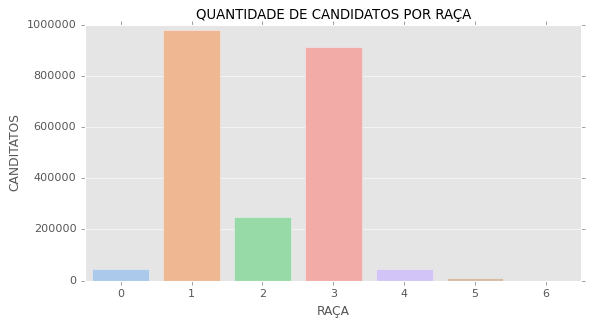

In [195]:
fig, ax = plt.subplots(figsize = ( 8 , 4 )) 
sns.countplot(db_2021_selec_limpos['TP_COR_RACA'], palette = 'pastel')   

ax.set_xlabel( "RAÇA" , size = 11) 
ax.set_ylabel( "CANDITATOS" , size = 11 ) 
ax.set_title( "QUANTIDADE DE CANDIDATOS POR RAÇA" , size = 12 ) 
plt.style.use('ggplot')
plt.show()

Quantidade de pardos e brancos superiores

### Ranking da média das notas por estado

As maiores médias por estado foram de homens

In [192]:

from IPython.core.display import HTML as Center

Center(""" <style>
   .output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style> """)

C:\Users\la-re\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



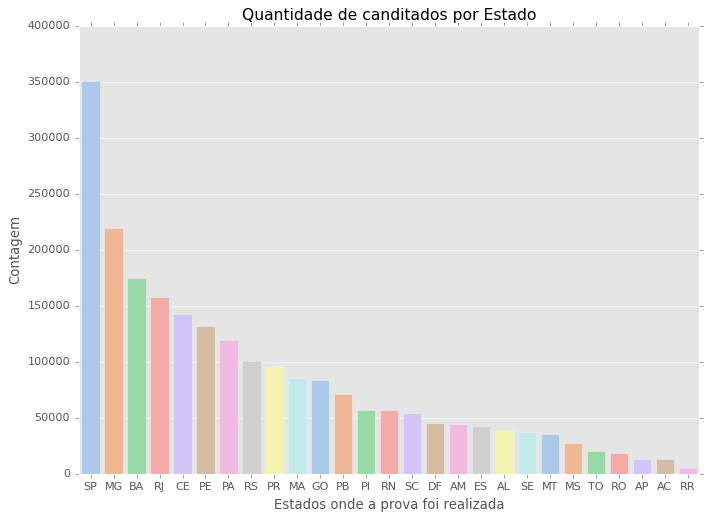

In [191]:
#quantidade de candidatos por estado
fig, ax = plt.subplots(figsize=(10, 7))
sns.countplot(db_2021_selec_limpos['SG_UF_PROVA'], palette = 'pastel',order=db_2021_selec_limpos['SG_UF_PROVA'].value_counts().index)   
ax.set_xlabel( "Estados onde a prova foi realizada" , size = 12 ) 
ax.set_ylabel( "Contagem" , size = 12 ) 
ax.set_title( "Quantidade de canditados por Estado" , size = 14 ) 
plt.style.use('ggplot')

plt.show()

Relação do ranking com a quantidade de inscritos

### Legenda dos dados do ano de conclusao:

Legenda| TP_ANO_CONCLUIU       
---| ------------------- --
0  |Não informado           
1  |2020                    
2  |2019                    
3  |2018                    
4  |2017                   
5  |2016                   
6  |2015                       
7  |2014             
8  |2012           
9  |2013  
10 |2011   
11 |2010   
12 |2009  
13 |2008   
14 |2007   
15 |Antes de 2007   


Legenda| TP_ESCOLA                
---| ------
1  |Não respondeu
2  |Pública
3  |Privada

Legenda| TP_ST_CONCLUSAO                
---| ------
1  |Já concluí o Ensino Médio
2  |Estou cursando e concluirei o Ensino Médio em 2021
3  |Estou cursando e concluirei o Ensino Médio após 2021
4  |Não concluí e não estou cursando o Ensino Médio

In [196]:
db_2021_selec_limpos['TP_ST_CONCLUSAO'].value_counts()


1    1016825
2     847399
3     367373
4       6510
Name: TP_ST_CONCLUSAO, dtype: int64

In [355]:
db_2021_selec_limpos['TP_ANO_CONCLUIU'].value_counts()

0     1303081
1      276836
2      158387
3      100071
15      93846
4       70782
5       50492
6       38899
7       30956
8       24727
9       20968
10      16987
11      15343
12      13831
13      11864
14      11037
Name: TP_ANO_CONCLUIU, dtype: int64

A maioria não informou o ano de conclusao, portanto fica sendo indicador ruim, mas será feita a relação do tempo de conclusão do ensino médio e as notas. 

In [492]:
#Localização das notas máximas de redação segundo o ano de conclusão
tabela_ano_c = db_2021_selec_limpos[['TP_ANO_CONCLUIU','NU_NOTA_REDACAO','SG_UF_PROVA']]
tabela_ano_c.sort_values(by='NU_NOTA_REDACAO', ascending=False).head(25)
filtro  = tabela_ano_c['NU_NOTA_REDACAO'] > 980 # selecionando apenas as notas mil
notas_mil = tabela_ano_c[filtro]

tabela_ano_c.sort_values(by='NU_NOTA_REDACAO', ascending=False).head(25)
notas_mil = tabela_ano_c[filtro]
notas_mil['SG_UF_PROVA'].value_counts()# localização das notas máximas por estado.


RJ    5
MG    4
SP    3
PE    3
BA    2
PA    1
GO    1
PB    1
CE    1
Name: SG_UF_PROVA, dtype: int64

Apenas 21 candidatos tiraram nota máxima na redação, tendo ocorrido em 9 estados no total

In [508]:
notas_mil.groupby('TP_ANO_CONCLUIU').count()

,NU_NOTA_REDACAO,SG_UF_PROVA
TP_ANO_CONCLUIU,,
0,7,7
1,2,2
2,4,4
3,7,7
4,1,1


Apesar de boa parte estar no "não informado" nota-se que as maiores notas se encontraram nas pessoas mais recentemente saídas do ensino médio

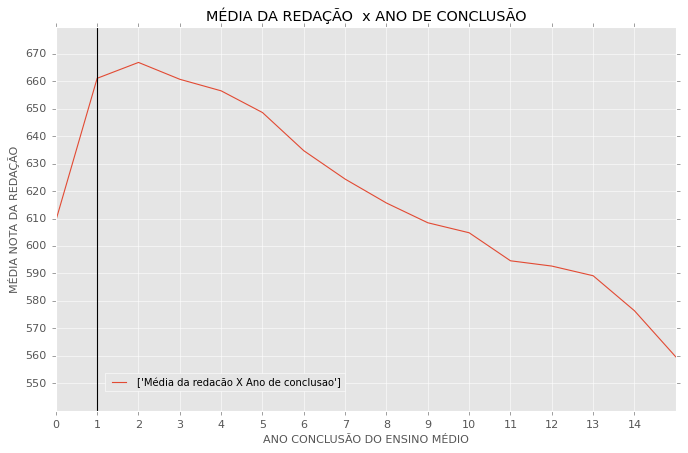

In [409]:
ano_conclusao = tabela_ano_c.pivot_table(index='TP_ANO_CONCLUIU', values='NU_NOTA_REDACAO', aggfunc='mean')
plt.figure(figsize=(10, 6))
plt.plot(ano_conclusao, label= ['Média da redacão X Ano de conclusao'])
plt.legend (ncol = 1, loc= (0.08, 0.05),fontsize=9)
plt.xlim(left=0)
plt.title('MÉDIA DA REDAÇÃO  x ANO DE CONCLUSÃO',fontsize=13)
plt.yticks(range(550, 680, 10)) # alterar escala do eixo
plt.xticks(range(0, 15, 1)) # alterar escala do eixo
plt.xlim(0, 15) # definir limite do eixo
plt.axvline(1, color='k') #criação de linha no ponto 1, onde o ano é especificado
plt.xlabel('ANO CONCLUSÃO DO ENSINO MÉDIO', fontsize=10)
plt.ylabel('MÉDIA NOTA DA REDAÇÃO', fontsize=10)

plt.show()


Conforme analisado, a maioria dos dados referentes ao ano de conclusão não sao informativos (0 ="não informado"), por isso a análise do gráfico a partir da linha preta é mais sólida. A partir desse ponto é possível ver uma tendência da média cair conforme o ano de formação se torna mais distante. Vide legenda acima. 

### Legenda renda mensal familiar

Legenda| Renda mensal da família (reais)            
-------| -----------------------
A      |Nenhuma Renda
B      |Até  1.100,00
C      |De  1.100,01 até  1.650,00
D      |De  1.650,01 até  2.200,00
E      |De  2.200,01 até  2.750,00
F      |De  2.750,01 até  3.300,00
G      |De  3.300,01 até  4.400,00
H      |De  4.400,01 até  5.500,00
I      |De  5.500,01 até  6.600,00
J      |De  6.600,01 até  7.700,00
K      |De  7.700,01 até  8.800,00
L      |De  8.800,01 até  9.900,00
M      |De  9.900,01 até  11.000,00
N      |De  11.000,01 até  13.200,00
O      |De  13.200,01 até  16.500,00
P      |De  16.500,01 até  22.000,00
Q      |Acima de  22.000,00


In [479]:
db_2021_selec_limpos['Q006'].value_counts()

B    546733
C    346838
D    277708
F    168049
G    147647
E    143957
H    118749
A    112899
I     75420
M     47849
J     46934
Q     39914
K     37157
O     32862
P     32802
L     32560
N     30028
Name: Q006, dtype: int64

Através dessa análise vemos que a maioria dos candidatos tem renda familiar até 4.400,00.

Como está distribuida a renda por estado?

In [330]:
#Média das notas de redação por renda familiar
notas_redacao_renda = db_2021_selec_limpos.filter(items=['NU_NOTA_REDACAO','Q006'])\
                  .groupby('Q006').mean()\
                  .sort_values(by='NU_NOTA_REDACAO', ascending=False)
notas_redacao_renda

,NU_NOTA_REDACAO
Q006,
Q,752.414191
P,745.189927
O,738.371371
N,730.735314
M,720.293423
L,712.899263
K,708.104529
J,701.767589
I,692.066295


In [512]:
notas_redacao_renda.describe()

,NU_NOTA_REDACAO
count,17.000000
mean,671.966555
std,65.462981
min,534.462307
25%,629.309308
50%,692.066295
75%,720.293423
max,752.414191


Através da análise é possível ver que conforme a renda aumenta a tendência é das notas também aumentarem, sendo a diferença mais discrepante comparando as menores rendas. Abaixo segue o gráfico relacionado 

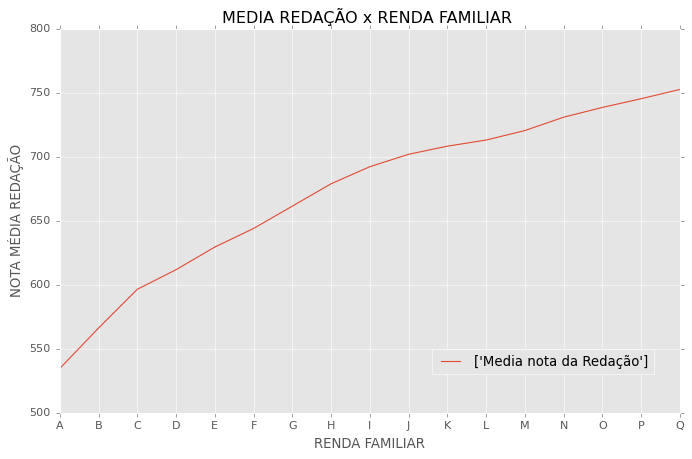

In [511]:
renda_REDACAO=notas_redacao_renda.pivot_table(index='Q006', values='NU_NOTA_REDACAO', aggfunc='mean')
plt.figure(figsize=(10, 6))
plt.plot(renda_REDACAO, label= ['Media nota da Redação'])
plt.legend (ncol = 1, loc= (0.6, 0.1))
plt.xlim(left=0)
plt.title('MEDIA REDAÇÃO x RENDA FAMILIAR ')
plt.xlabel('RENDA FAMILIAR')
plt.ylabel('NOTA MÉDIA REDAÇÃO')
plt.show()


In [522]:
#média das notas de redação de cada estado em relação a renda familiar
teste50.pivot_table(index='Q006', columns='SG_UF_PROVA', values='NU_NOTA_REDACAO', aggfunc='mean').head(5)

SG_UF_PROVA,AC,AL,AM,AP,BA,CE,DF,ES,GO,MA,...,PR,RJ,RN,RO,RR,RS,SC,SE,SP,TO
Q006,,,,,,,,,,,,,,,,,,,,,
A,526.968026,543.663764,469.777995,519.185022,537.493184,508.663151,545.402766,548.015564,520.425080,520.433464,...,547.740864,549.336512,548.973670,502.814371,518.549223,544.310656,581.397206,550.087617,555.902899,505.225410
B,550.224176,574.432793,505.740135,540.666667,573.652642,552.116983,555.838281,573.498377,552.060170,559.432326,...,559.629073,573.144484,582.609473,541.706280,525.560976,563.940249,564.429210,587.797124,566.841486,544.421292
C,580.661080,604.553614,545.621866,570.891455,605.710329,609.679321,577.149817,600.104712,581.694402,597.856062,...,570.920379,599.954878,611.055831,565.496002,561.931818,584.707258,582.572187,619.244969,591.307867,576.526542
D,591.358735,628.287293,558.797536,587.815126,626.042619,639.024574,592.212841,610.047611,600.731014,618.667746,...,580.783889,614.304642,625.224226,576.915716,589.048474,595.187680,594.352131,645.285601,603.267937,592.426083
E,610.490196,642.703566,574.492308,603.290676,648.021330,669.129173,604.044299,630.134111,625.008073,640.639740,...,591.536681,635.407449,656.381806,587.923186,579.477612,610.496144,604.715550,668.034188,620.988976,617.743590


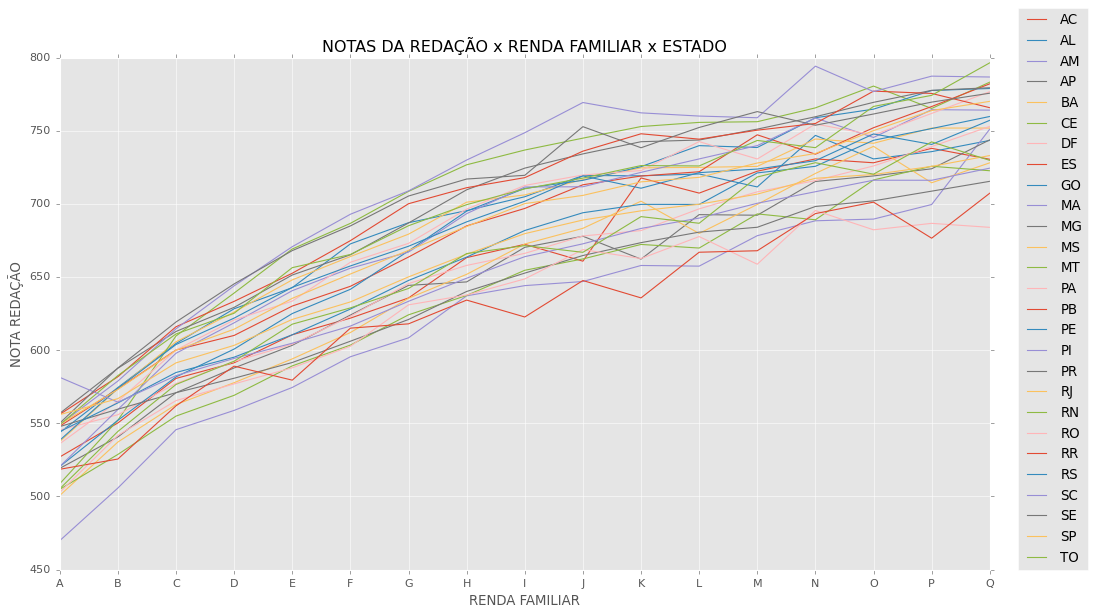

In [332]:
df55=teste50.pivot_table(index='Q006', columns='SG_UF_PROVA', values='NU_NOTA_REDACAO', aggfunc='mean')
plt.figure(figsize=(15, 8))
plt.plot(df55, label= ['AC', 'AL', 'AM', 'AP', 'BA', 'CE', 'DF', 'ES', 'GO', 'MA', 'MG', 'MS', 'MT', 'PA', 'PB', 'PE', 'PI', 'PR', 'RJ', 'RN', 'RO', 'RR', 'RS', 'SC', 'SE', 'SP', 'TO'])
plt.legend (ncol = 1, loc= (1.03, 0))
plt.xlim(left=0)
plt.title('NOTAS DA REDAÇÃO x RENDA FAMILIAR x ESTADO')
plt.xlabel('RENDA FAMILIAR')
plt.ylabel('NOTA REDAÇÃO')
plt.show()


Aqui a tendência de crescimento da média conforme a renda aumenta é verificada mais uma vez, mas é possível ver que a partir da renda J (De 6.600,01 até 7.700,001) a flutuação se torna mais evidente, boas notas começam a ser encontradas em todas as rendas, apesar da curva se manter subindo.

In [546]:
nova_data2= db_2021_selec_limpos.drop(columns=[ 'TP_ST_CONCLUSAO','TP_ANO_CONCLUIU','TP_ESCOLA','TP_FAIXA_ETARIA','TP_SEXO','TP_ESTADO_CIVIL','IN_TREINEIRO','NU_NOTA_COMP1','NU_NOTA_COMP2','NU_NOTA_COMP3','NU_NOTA_COMP4','NU_NOTA_COMP5','TP_COR_RACA', 'TP_PRESENCA_CN','TP_PRESENCA_CH','TP_PRESENCA_LC','TP_PRESENCA_MT','TP_NACIONALIDADE','TP_ENSINO','TP_LINGUA','TP_STATUS_REDACAO', 'Q001','Q002','Q003','Q004','Q005','Q005','Q007'])
# Média de todas as notas em relação a renda.
Media = pd.pivot_table(nova_data2, index=['Q006'])

#### A mesma análise será feita tirando a média de todas as notas 

In [521]:
notas_Media = Media.assign(Media_Total = (Media.NU_NOTA_CH +Media.NU_NOTA_CN + Media.NU_NOTA_LC + Media.NU_NOTA_MT+ Media.NU_NOTA_REDACAO) /5)
notas_Media.head(2)

,NU_ANO,NU_NOTA_CH,NU_NOTA_CN,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,Media_Total
Q006,,,,,,,
A,2021,471.924401,449.259398,454.178489,470.339162,534.462307,476.032752
B,2021,485.195380,458.595073,469.805110,484.990884,566.065813,492.930452


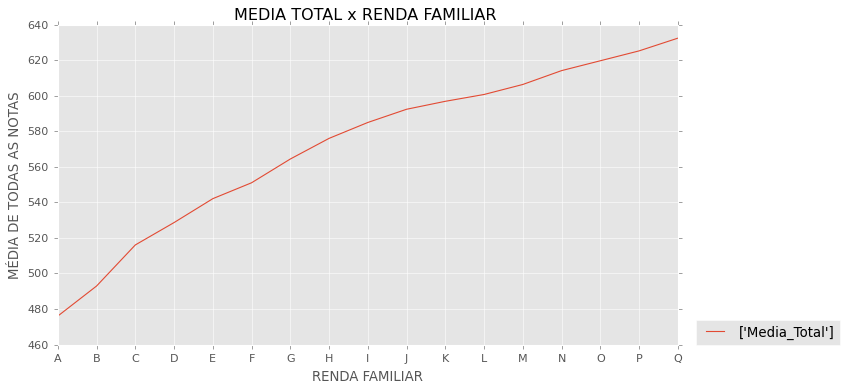

In [515]:
renda_notageral=notas_Media.pivot_table(index='Q006', values='Media_Total', aggfunc='mean')
plt.figure(figsize=(10, 5))
plt.plot(renda_notageral, label= ['Media_Total'])
plt.legend (ncol = 1, loc= (1.03, 0))
plt.xlim(left=0)
plt.title('MEDIA TOTAL x RENDA FAMILIAR ')
plt.xlabel('RENDA FAMILIAR')
plt.ylabel('MÉDIA DE TODAS AS NOTAS')
plt.show()


### Conclusão

Através das análises realizadas foi constatado que a média feminina nas matéria foi mais baixa, exceto em redação, onde as candidatas obtiveram o maior desempenho. A maior diferença aconteceu na matéria de matemática e isso pode ter acontecido devido a falta de incentivo para as mulheres entrarem na área de exatas em muitas escolas e famílias.
O mesmo pode ser levantado como hipótese para o pior desempenho dos candidatos do sexo masculino em redação, por se manterem mais distantes das competências necessárias para se fazer uma boa redação.

A maioria dos inscritos foram pardos e brancos.

Os estados com melhores notas foram os com o maior PIB e as melhores notas foram daqueles candidatos que possuem maior renda familiar. Isso corrobora para a conclusão de que a maior qualidade de vida influência no desempenho dos candidatos, principalmente em relação aos candidatos com as menores rendas, que obtiveram as piores notas.

